In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import random
import datetime
import seaborn
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from time import time
from datetime import datetime, date
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
path1 = [['/media/sf_helicopter_connection/emiData2018/2018.11.24', '2018.11.24_05.26.21_morning_star'],
         ['/media/sf_helicopter_connection/emiData2018/2018.12.03', '2018.12.03_05.57.11_morning_emi'],
         ['/media/sf_helicopter_connection/emiData2018/2018.12.04', '2018.12.04_05.32.24_morning_emi']]

time_to_number = {}

In [3]:
x = pd.Series([])
y = pd.Series([])
print(x)
print(y)
x[0] = 0
y[0] = 0

Series([], dtype: float64)
Series([], dtype: float64)


In [4]:
dataset = pd.DataFrame(columns = ['class','signal'])
dataset

,class,signal


In [5]:
#Считывание данных из одного файла
def opFile(path, filename, file_number):
    os.chdir(path)

    try:
        file = open('./' + str(filename) + str(file_number) + '_module_filtered.dat', 'r')
    except IOError:
        return
    element_number = 0;
    while True:
        st = file.readline()
        if st == '':
            break
        str_data = st.split()
        element_number += 1
        time_to_number[float(str_data[0])] = element_number - 1
        x[x.index.max() + 1] = float(str_data[0])
        y[y.index.max() + 1] = float(str_data[1])

In [6]:
#Считывание данных из n файлов
def dataExec(path_number, files_range):
    for i in range(1, files_range):
        opFile(path1[path_number - 1][0], path1[path_number - 1][1], i)

In [7]:
#Нарезает непрерывные данные на сигналы однаковой длины и помечает "истинные".
#Длина "истинного" сигнала варьируется от 500 до 600 значений, поэтому
#ширина окна выбрана 600.
def cutter():
    os.chdir('/media/sf_helicopter_connection/emiData2018/')
    emitrue = open('emitrue.dat', 'r')            #Открытие файла со временем возникновения "истинных" сигналов
    list_of_lines = emitrue.readlines()
    number_of_true_signals = len(list_of_lines)
    step = 10                                     #Шаг движения окна
    window_width = 600                            #Ширина окна
    start_time = []
    stop_time = []
    global dataset
    dataset = pd.DataFrame(columns = ['class','signal'])
    for i in range(0, number_of_true_signals - 1):
        time = list_of_lines[i].split()
        start_time.append(float(time[0]))
        stop_time.append(float(time[1]))

    for j in range(1, x.index.max(), step):
        signal = np.empty(window_width)
        if (x.index.max() - j) < window_width:
            break
        for i in range(0, window_width):
            signal[i] = ny[j+i]
        for k in range(0, len(start_time)):
            if abs(x[j] - start_time[k]) < 0.000002000:
                dataset = dataset.append({'class':1, 'signal':signal}, ignore_index=True)
                break
            else:
                dataset = dataset.append({'class':0, 'signal':signal}, ignore_index=True)


In [8]:
dataExec(1, 10)

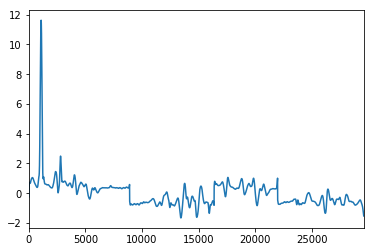

In [9]:
#Нормирование данных и отображение
ny = (y - y.mean())/y.std()
ny.plot()

In [10]:
cutter()

In [11]:
#Истинные сигналы (на самом деле некоторые сигналы попадают 2-3 раза
#с небольшим сдвигом, но, думаю, это не страшно)
dataset[dataset['class']==1]

,class,signal
11490,1,"[0.39034476206762314, 0.39133921712493935, 0.3..."
11491,1,"[0.40315375044409824, 0.4048116725300225, 0.40..."
15153,1,"[0.5665808252437974, 0.5639590816469907, 0.561..."
39846,1,"[-0.9381179803473073, -0.9457174045879385, -0...."
44530,1,"[-1.5607167348253783, -1.558098921961959, -1.5..."
55545,1,"[0.3533520985862689, 0.3546010579642341, 0.355..."
55550,1,"[0.367196659996443, 0.36875081060738074, 0.370..."
59036,1,"[0.5592940332755221, 0.5624160011502768, 0.565..."
59042,1,"[0.5934361368314437, 0.5971633877461374, 0.600..."
78369,1,"[-1.3412173386106212, -1.3419125667749745, -1...."


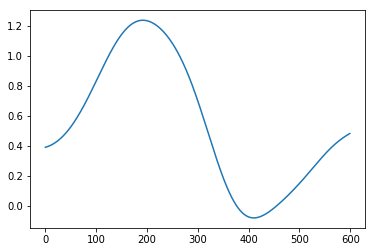

In [12]:
#Образец истинного сигнала
plt.plot(dataset.loc[11490, 'signal'])
plt.show()

In [13]:
#Сокращение выборки, чтобы примерно уравнять количество "истинных" и "ложных" сигналов
temp_dataset = pd.DataFrame(columns = ['class','signal'])
step = 2000
for i in range(0, dataset['class'].size // step * step, step):
    if dataset['class'].iloc[i] == 1:
        break
    temp_dataset = temp_dataset.append(dataset[dataset['class'] ==0].iloc[i], ignore_index=True)

In [14]:
temp_dataset = temp_dataset.append(dataset[dataset['class'] ==1], ignore_index=True)
temp_dataset[temp_dataset['class']==1]

,class,signal
43,1,"[0.39034476206762314, 0.39133921712493935, 0.3..."
44,1,"[0.40315375044409824, 0.4048116725300225, 0.40..."
45,1,"[0.5665808252437974, 0.5639590816469907, 0.561..."
46,1,"[-0.9381179803473073, -0.9457174045879385, -0...."
47,1,"[-1.5607167348253783, -1.558098921961959, -1.5..."
48,1,"[0.3533520985862689, 0.3546010579642341, 0.355..."
49,1,"[0.367196659996443, 0.36875081060738074, 0.370..."
50,1,"[0.5592940332755221, 0.5624160011502768, 0.565..."
51,1,"[0.5934361368314437, 0.5971633877461374, 0.600..."
52,1,"[-1.3412173386106212, -1.3419125667749745, -1...."


In [15]:
temp_dataset['class']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
Name: class, dtype: object

In [16]:
#Разбиение датафрейма на нампи массивы, чтобы успешно "скормить" методу
signal = np.empty([1,600])
classes = np.empty(1)
for j in range(1, temp_dataset['class'].index.max()):
    classes = np.append(classes, temp_dataset['class'][j])
    temp = np.empty([1,600])
    for i in range(0, 599):
        temp[0][i] = float(temp_dataset['signal'][j][i])
    signal = np.append(signal, temp, axis=0)
classes = classes[1:classes.size]
signal = signal[1:signal.size/600]

In [17]:
# Данные для обучения
# Х - признаки  
# Y - верные ответы 

Xn = signal
Yn = classes

X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size = 0.3, random_state = 11)

In [95]:
#Метод к ближайших соседей
def KNClass(X_train, Y_train, X_test, Y_test):
    n_neighbors_array = [i for i in range(1, 25)]
    metric_array = ['euclidean','manhattan', 'chebyshev',]
    err = {'euclidean':[],'manhattan':[], 'chebyshev':[],}
    t = {'euclidean':[],'manhattan':[], 'chebyshev':[],}
    for i in n_neighbors_array:
        for met in metric_array:
            knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric=met,weights='distance')
            knn.fit(X_train, Y_train)
            t0 = time()
            y_test_predict = knn.predict(X_test)
            t1 = time()
            err[met].append(round(np.mean(Y_test  != y_test_predict)*100))
            t[met].append(round(t1-t0,5)/Y_test.size)
    p1 = pd.Series(t,index=n_neighbors_array)
    p2 = pd.Series(err,index=n_neighbors_array)
    KNeighbors_time = pd.DataFrame(t, index=n_neighbors_array)                
    KNeighbors_err = pd.DataFrame(err, index=n_neighbors_array)
    return(KNeighbors_err, KNeighbors_time)
print('errors:')
print(KNClass(X_train, Y_train, X_test, Y_test)[0])
print('time:')
print(KNClass(X_train, Y_train, X_test, Y_test)[1])  

errors:
    chebyshev  euclidean  manhattan
1        18.0       18.0       18.0
2        18.0       18.0       18.0
3        12.0       18.0       18.0
4        12.0       12.0       12.0
5         6.0        6.0        6.0
6         6.0        6.0        6.0
7         6.0        6.0        6.0
8         6.0        6.0        6.0
9         6.0        6.0        6.0
10       12.0        6.0        6.0
11       18.0        6.0        6.0
12       18.0        6.0       12.0
13       24.0       18.0       12.0
14       24.0       12.0       12.0
15       24.0       18.0       18.0
16       24.0       18.0       18.0
17       24.0       18.0       18.0
18       24.0       18.0       18.0
19       24.0       24.0       18.0
20       24.0       24.0       18.0
21       29.0       24.0       24.0
22       29.0       24.0       24.0
23       29.0       29.0       24.0
24       29.0       29.0       29.0
time:
    chebyshev  euclidean  manhattan
1    0.000072   0.000090   0.000101
2    0.000071 

In [19]:
#Наивный байес
def nb(X_train, Y_train, X_test, Y_test):
    model = GaussianNB()
    # Train the model using the training sets 
    model.fit(X_train, Y_train)
    
    err_train = round(np.mean(Y_train != model.predict(X_train))*100, 2)
    err_test  = round(np.mean(Y_test  != model.predict(X_test))*100, 2)
    
    return(err_train, err_test)

(train, test) = nb(X_train, Y_train, X_test, Y_test)
print('error on train data:')
print(train)
print('error on test data:')
print(test)

error on train data:
59.46
error on test data:
52.94


In [93]:
#SVC
def svc(X_train, Y_train, X_test, Y_test):
    C = [i for i in range(1,11)]
    kernel = ['linear', 'rbf', 'poly', 'sigmoid']
    degree = [i for i in range(2,6)]
    err_train = []
    err_test = []
    for k in kernel:
        if k == 'linear' or k == 'rbf' or k == 'sigmoid':
            for c in C:
                svc = SVC(C=c, kernel=k)
                svc.fit(X_train, Y_train)
                t1 = time()
                train_pred = round(np.mean(Y_train != svc.predict(X_train))*100, 2)
                t2 = time()
                test_pred = round(np.mean(Y_test != svc.predict(X_test))*100, 2)
                t3 = time()
                err_train.append([k, 'ignored', c, train_pred,round(t2-t1,5)/Y_train.size])
                err_test.append([k, 'ignored', c, test_pred,round(t3-t2,5)/Y_test.size])
        if k == 'poly':
            for d in degree:
                for c in C:
                    svc = SVC(C=c, kernel=k, degree=d)
                    t0 = time()
                    svc.fit(X_train, Y_train)
                    t1 = time()
                    train_pred = round(np.mean(Y_train != svc.predict(X_train))*100, 2)
                    t2 = time()
                    test_pred = round(np.mean(Y_test != svc.predict(X_test))*100, 2)
                    t3 = time()
                    err_train.append([k, d, c, train_pred,round(t2-t1,5)/Y_train.size])
                    err_test.append([k, d, c, test_pred,round((t3-t2),5)/Y_test.size])
    
    return(err_train, err_test)

(train, test) = svc(X_train, Y_train, X_test, Y_test)

In [94]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
print('kernel, degree, C, min_train_error, time')
for k in kernel:
    temp = 100
    num = 0
    for i in range(0, len(train)):
        if train[i][0] == k:
            if train[i][3] < temp:
                temp = train[i][3]
                num = i        
    print(train[num])

print('kernel, degree, C, min_test_error, time')
for k in kernel:
    temp = 100
    num = 0
    for i in range(0, len(test)):
        if test[i][0] == k:
            if test[i][3] < temp:
                temp = test[i][3]
                num = i        
    print(test[num])

kernel, degree, C, min_train_error, time
['linear', 'ignored', 2, 10.81, 2.3783783783783785e-05]
['rbf', 'ignored', 5, 2.7, 4.4594594594594596e-05]
['poly', 2, 8, 8.11, 0.00012756756756756758]
['sigmoid', 'ignored', 2, 16.22, 1.4864864864864867e-05]
kernel, degree, C, min_test_error, time
['linear', 'ignored', 1, 17.65, 2.3529411764705884e-05]
['rbf', 'ignored', 3, 23.53, 2.3529411764705884e-05]
['poly', 2, 1, 29.41, 1.941176470588235e-05]
['sigmoid', 'ignored', 2, 17.65, 1.8235294117647057e-05]


In [134]:
from sklearn.tree import DecisionTreeClassifier

def dectree(X_train, Y_train, X_test, Y_test, integer=False):
    err = []
    depth = [i for i in range(1,21)]
    crit = ['gini', 'entropy']
    split = ['best', 'random']
    random = [i for i in range(1,21)]
    
    for s in split:
        for c in crit:
            for r in random:
                for d in depth:
                    clf_tree = DecisionTreeClassifier(criterion=c, max_depth=d, random_state=r, splitter=s, presort=True)
                    clf_tree.fit(X=X_train, y=Y_train)
                    if integer:
                        err_train = round(np.mean(Y_train != clf_tree.predict(X_train).astype('int'))*100, 2)
                        t1 = time()
                        err_test  = round(np.mean(Y_test  != clf_tree.predict(X_test).astype('int'))*100, 2)
                    else:
                        err_train = round(np.mean(Y_train != clf_tree.predict(X_train))*100, 2)
                        t1 = time()
                        err_test  = round(np.mean(Y_test  != clf_tree.predict(X_test))*100, 2)
                        t2 = time()
                    err.append([s,c,r,d,err_test,round(t2 - t1,5)/Y_test.size])
    return err

In [135]:
err = dectree(X_train, Y_train, X_test, Y_test)

In [136]:
crit = ['gini', 'entropy']
print('splitter, criteria, random, depth, time')
for c in crit:
    temp = 100
    num = 0
    for i in range(0, len(err)):
        if err[i][1] == c:
            if err[i][4] < temp:
                temp = err[i][4]
                num = i        
    print(err[num])

splitter, criteria, random, depth, time
['best', 'gini', 5, 2, 11.76, 9.411764705882354e-06]
['random', 'entropy', 2, 3, 11.76, 5.294117647058824e-06]
